In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

In [89]:
color_mapping12 = {
    "C>A": "deepskyblue",
    "G>T": "deepskyblue",
    "C>G": "black",
    "G>C": "black",
    "C>T": "red",
    "G>A": "red",
    "T>A": "silver",
    "A>T": "silver",
    "T>C": "yellowgreen",
    "A>G": "yellowgreen",
    "T>G": "pink",
    "A>C": "pink",
}
sbs12_ordered = ["C>A", "G>T", "C>G", "G>C", "C>T", "G>A", "T>A", "A>T", "T>C", "A>G", "T>G", "A>C"]
colors12 = [color_mapping12[sbs] for sbs in sbs12_ordered]

In [90]:
clade_df = pd.read_csv('../data/rates_by_clade.csv')

In [91]:
clade_df = clade_df[['clade', 'mut_type', 'rate']]
clade_df['mut_type'] = clade_df['mut_type'].str.replace('to','>')

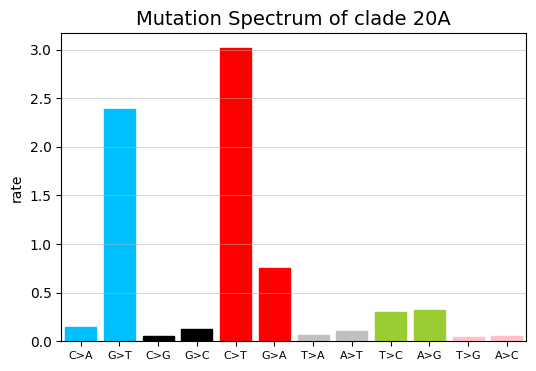

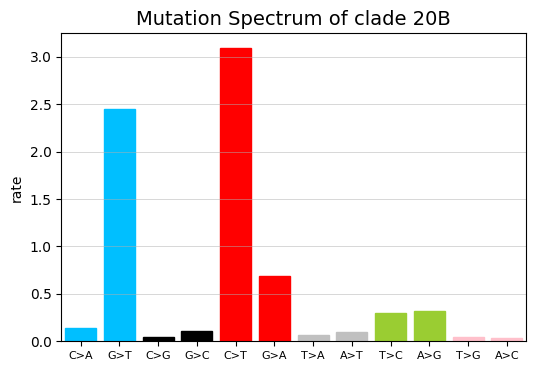

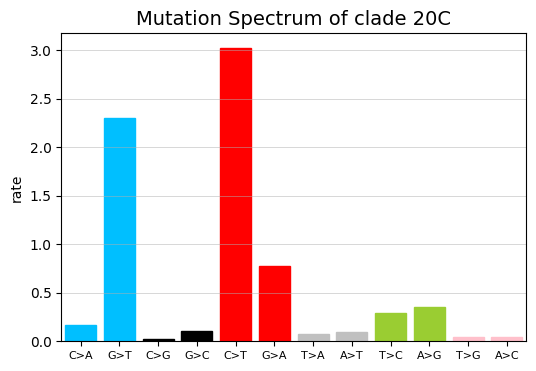

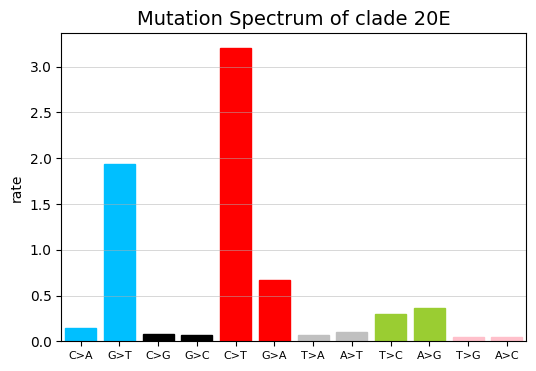

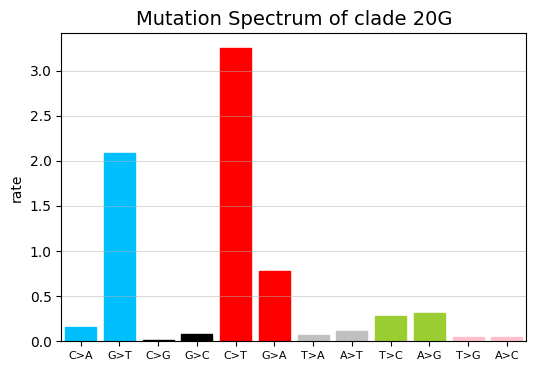

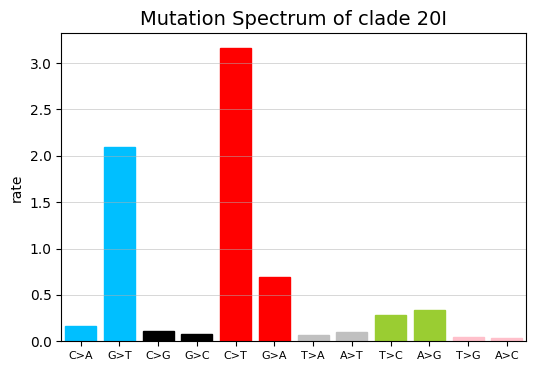

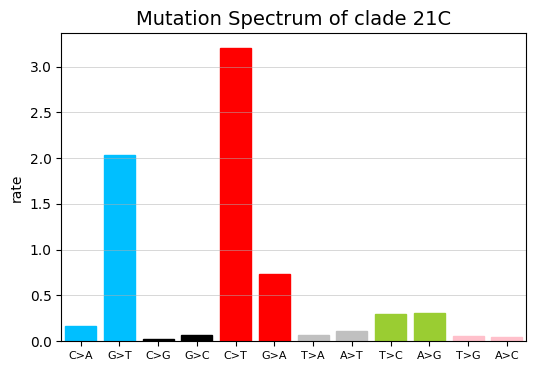

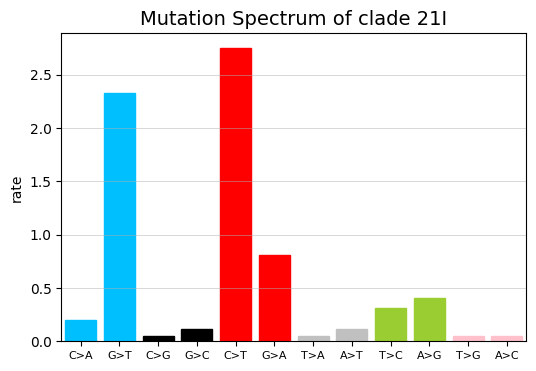

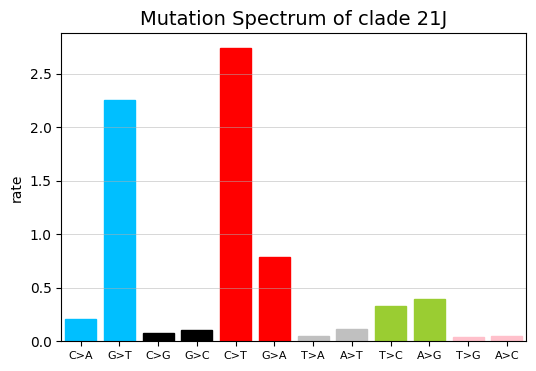

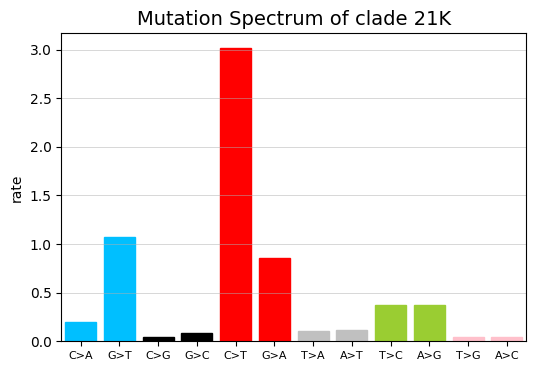

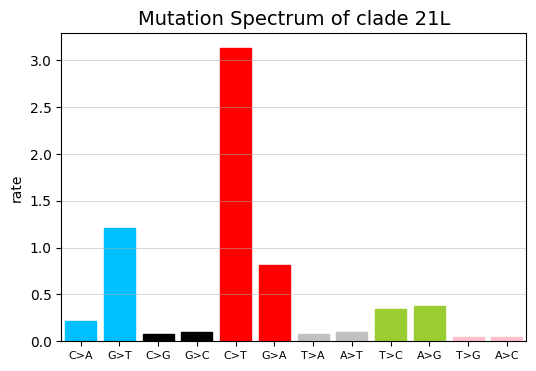

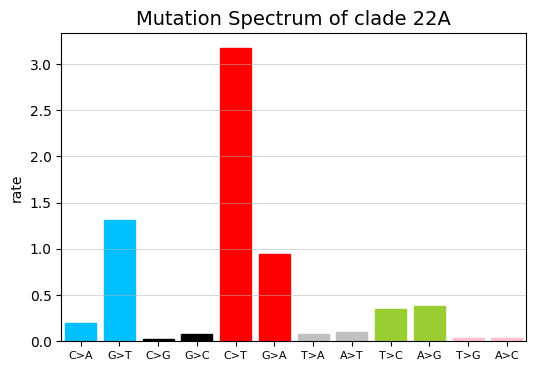

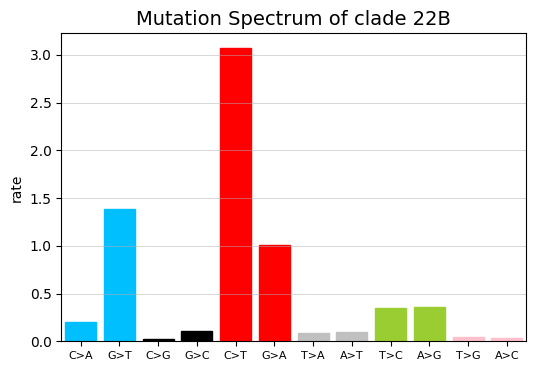

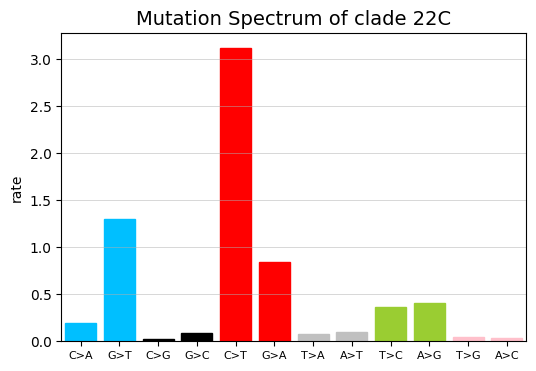

In [93]:
for clade in list(clade_df['clade'].unique()):
    one_clade_df = clade_df[clade_df['clade']==clade]
    fig = plt.figure(figsize=(6, 4))
    ax = sns.barplot(x="mut_type", y='rate', data=one_clade_df, order=sbs12_ordered, ax=fig.gca())
    ax.grid(axis="y", alpha=.7, linewidth=0.5)
    for bar, clr in zip(ax.patches, colors12):
        bar.set_color(clr)
    ax.set_title('Mutation Spectrum of clade '+clade, fontsize=14)
    ax.set_xlabel("")
    plt.xticks(fontsize=8)
    plt.show()
    plt.close()

In [94]:
clade_df.head()

,clade,mut_type,rate
0,20A,A>C,0.057407
1,20A,A>G,0.324570
2,20A,A>T,0.103370
3,20A,C>A,0.143810
4,20A,C>G,0.055147


In [95]:
pca_df = clade_df.pivot(index='clade', columns='mut_type', values='rate').rename_axis(index=None, columns=None)
pca_df.index.name = 'clade_name'
pca_df = pca_df.reset_index()

In [97]:
clade_names = pca_df['clade_name']
pca_data_only = pca_df.drop('clade_name', axis=1)

In [98]:
pca = PCA()
pca_data = pca.fit_transform(pca_data_only)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(pca_data_only.columns))])

In [99]:
pca_data1 = pca_data[["pc1","pc2"]].copy()

In [102]:
categories = np.unique(pca_df['clade_name'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
pca_df["Color"] = pca_df['clade_name'].apply(lambda x: colordict[x])

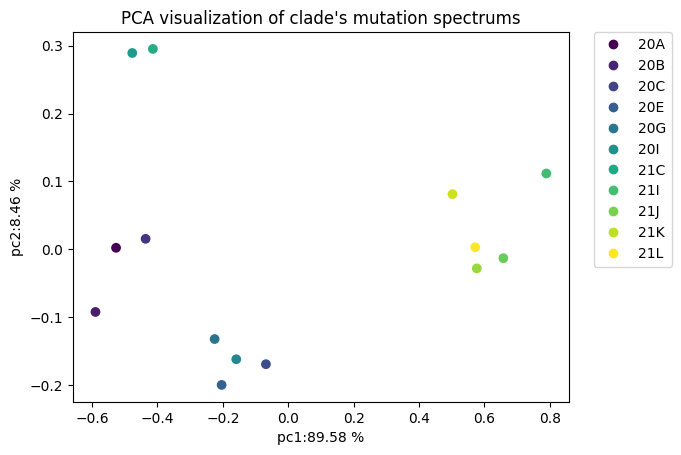

In [119]:
scatter = plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=pca_df["Color"])
plt.title("PCA visualization of clade's mutation spectrums")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=scatter.legend_elements()[0], labels=list(pca_df['clade_name']))
plt.show()
plt.close()